## PCA

[pca的实现](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html) 
<br>
[原理](http://blog.csdn.net/zhongkelee/article/details/44064401)

### 1. 生成三维的随机数据
+ 多元高斯分布
  $
    u_1 = [0,0,0],
    u_2 = [1,1,1],
    \Sigma_1 = \Sigma_2 = 
        \begin{pmatrix} 
        1 & 0 & 0\\
        0 & 1 & 0\\
        0 & 0 & 1\\
        \end{pmatrix}
  $

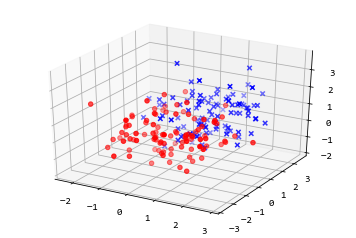

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

sample_num = 100

mean_1 = np.array([0,0,0])
cov_1 = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1]])
class_1_sample = np.random.multivariate_normal(mean_1,cov_1,sample_num)

mean_2 = np.array([1,1,1])
cov_2 = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1]])
class_2_sample = np.random.multivariate_normal(mean_2,cov_2,sample_num)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = class_1_sample[:,0],
           ys = class_1_sample[:,1],
           zs = class_1_sample[:,2],
           marker="o",c="r")

ax.scatter(xs = class_2_sample[:,0],
           ys = class_2_sample[:,1],
           zs = class_2_sample[:,2],
           marker="x",c="b")
plt.show()

### 2. 预处理&构建协方差矩阵

In [2]:
sample_all = np.concatenate((class_1_sample,class_2_sample),axis = 0)
sample_mean = sample_all.mean(axis = 0)
sample_preprocess = sample_all - sample_mean
cov_matrix = np.matmul(sample_preprocess.T,sample_preprocess)
cov_matrix = cov_matrix/sample_preprocess.shape[0]
cov_matrix

array([[ 1.08021155,  0.35808443,  0.30642678],
       [ 0.35808443,  1.35870611,  0.30255683],
       [ 0.30642678,  0.30255683,  1.0416569 ]])

### 3. 计算协方差矩阵的特征值和特征向量

In [3]:
# 特征向量按列分布，即特征值eig_val[i]对应的特征向量为eig_vec[:,i]
eig_val, eig_vec = np.linalg.eig(cov_matrix)
print(eig_val)
print(eig_vec)
print(np.matmul(cov_matrix,eig_vec))
print(eig_val*eig_vec)

[ 1.8317834   0.7515027   0.89728846]
[[-0.52876219 -0.73310648  0.42774459]
 [-0.70372329  0.09690382 -0.70383462]
 [-0.47453564  0.67317497  0.56714318]]
[[-0.96857781 -0.5509315   0.38381029]
 [-1.28906865  0.07282348 -0.63154269]
 [-0.8692465   0.50589281  0.50889103]]
[[-0.96857781 -0.5509315   0.38381029]
 [-1.28906865  0.07282348 -0.63154269]
 [-0.8692465   0.50589281  0.50889103]]


### 4.  选取变换矩阵并变换到子空间

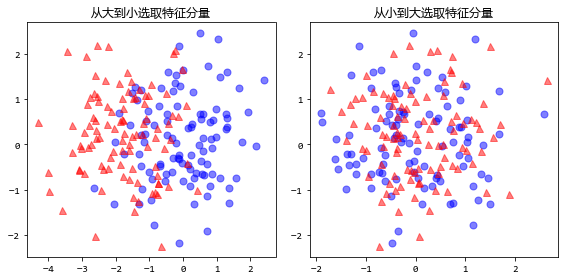

In [4]:
plt.figure(figsize=(8,4))

# 按照正常从大到小选取
sorted_index = eig_val.argsort()[::-1]
transform_matrix = eig_vec[:,sorted_index[:2]]
pca_result = sample_all.dot(transform_matrix)

ax = plt.subplot(121)
ax.plot(pca_result[:sample_num,0], pca_result[:sample_num,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
ax.plot(pca_result[sample_num:,0], pca_result[sample_num:,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
ax.set_title("从大到小选取特征分量")

# 从小到大，对比
sorted_index = eig_val.argsort()
transform_matrix = eig_vec[:,sorted_index[:2]]
pca_result = sample_all.dot(transform_matrix)
ax = plt.subplot(122)
ax.plot(pca_result[:sample_num,0], pca_result[:sample_num,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
ax.plot(pca_result[sample_num:,0], pca_result[sample_num:,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
ax.set_title("从小到大选取特征分量")

plt.tight_layout()
plt.show()